In [10]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Generate some example data
np.random.seed(0)  # For reproducibility
X = np.random.randn(100, 2)  # 100 samples, 2 features
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term (column of ones)
y = np.dot(X, np.array([1.5, -2, 0.5])) + np.random.randn(100)  # Generating a response

# Creating a DataFrame with features and the target variable
column_names = ['Intercept', 'Feature1', 'Feature2', 'Target']
data = np.column_stack((X, y))
df = pd.DataFrame(data, columns=column_names)

# Save DataFrame to CSV
# df.to_csv('regression_data.csv', index=False)
# print("Data saved to 'regression_data.csv'")

# OLS Regression from scratch

In [11]:
# Function to compute the OLS linear regression coefficients
def linear_OLS(X, y):
    """
    Calculate the coefficients of a linear regression using the Ordinary Least Squares method.
    
    Parameters:
    X : numpy.ndarray
        The matrix of input features. Should include a column of ones if the model includes an intercept.
    y : numpy.ndarray
        The vector of target values.
    
    Returns:
    numpy.ndarray
        The vector of calculated coefficients (beta values).
    """
    # Step 1: Calculate the transpose of X
    X_transpose = np.transpose(X)
    
    # Step 2: Calculate the dot product of X_transpose and X
    X_trans_X = np.dot(X_transpose, X)
    
    # Step 3: Compute the inverse of the dot product of X_transpose and X
    # This is often referred to as the 'covariance matrix' of the estimates
    X_trans_X_inv = np.linalg.inv(X_trans_X)
    
    # Step 4: Calculate the dot product of the inverse covariance matrix and the transpose of X
    X_trans_X_inv_X_trans = np.dot(X_trans_X_inv, X_transpose)
    
    # Step 5: Calculate the dot product of the above result with the vector of target values y
    # This results in the vector of coefficients
    coefficients = np.dot(X_trans_X_inv_X_trans, y)
    
    return coefficients, X_trans_X_inv # covariance matrix is needed for standard error calculation

In [16]:
# Calculate standard errors of the coefficients
def calculate_statistics(X, y, coefficients, covariance_matrix):
    """
    Calculate standard errors for each regression coefficient.
    
    Parameters:
    X : numpy.ndarray
        The matrix of input features.
    y : numpy.ndarray
        The vector of target values.
    coefficients : numpy.ndarray
        The regression coefficients (betas).
    covariance_matrix : numpy.ndarray
        The inverse of the X'X matrix (covariance matrix of the estimates).
    
    Returns:
    numpy.ndarray
        The standard errors of the coefficients.
    """
    residuals = y - np.dot(X, coefficients)
    residual_variance = np.dot(residuals, residuals) / (len(y) - len(coefficients))
    standard_errors = np.sqrt(np.diag(covariance_matrix) * residual_variance)
    t_values = coefficients / standard_errors
    
    # Calculate p-values
    degrees_of_freedom = len(y) - len(coefficients)
    p_values = [2 * (1 - t.cdf(np.abs(t_val), df=degrees_of_freedom)) for t_val in t_values]
    
    # Calculate 95% confidence intervals
    t_critical = t.ppf(0.975, df=degrees_of_freedom)  # two-sided 95% confidence, so 0.975
    confidence_intervals = [(coef - t_critical * se, coef + t_critical * se) for coef, se in zip(coefficients, standard_errors)]
    
    return standard_errors, t_values, p_values, confidence_intervals

In [13]:
# Calculate the OLS coefficients
coefficients, cov_matrix = linear_OLS(X, y)
coefficients

array([ 1.44858887, -1.8895351 ,  0.4459629 ])

In [18]:
# Calculate standard errors
standard_errors, t_values, p_values, confidence_intervals = calculate_statistics(X, y, coefficients, cov_matrix)
print(standard_errors)
print(t_values)
print(p_values)
print(confidence_intervals)

[0.09674321 0.09376987 0.09433688]
[ 14.97354514 -20.15077118   4.72734426]
[0.0, 0.0, 7.705912909772294e-06]
[(1.2565803758289247, 1.640597373793624), (-2.0756423234442716, -1.703427872126597), (0.25873031035688443, 0.6331954899405732)]


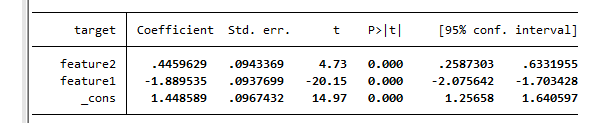